## Import Libraries

In [2]:
import pandas as pd
import numpy as np


In [5]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [6]:
#dataset.to_csv('NSE-TATAGLOBAL.csv')

In [13]:
dataset = pd.read_csv('NSE-TATAGLOBAL.csv')
dataset

,Unnamed: 0,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...,...
2030,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


## Reversing dataset

In [14]:
dataset_1 = dataset.iloc[:,1:]

In [15]:
dataset_1 

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [18]:
reversed_df = dataset_1 .iloc[::-1]
reversed_df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [19]:
df1 = reversed_df.reset_index()['Close']

In [20]:
df1

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

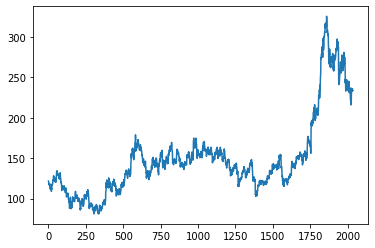

In [21]:
import matplotlib.pyplot as plt
plt.plot(df1)

## Scaling data

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [24]:
print(df1)

[[0.16584967]
 [0.16319444]
 [0.1621732 ]
 ...
 [0.62622549]
 [0.62214052]
 [0.62418301]]


## splitting dataset into train and test split

In [31]:
training_size = int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data= df1[0:training_size,:],df1[training_size:len(df1),:1]

In [32]:
training_size,test_size

(1322, 713)

In [33]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.19546569],
       [0.18280229],
       [0.19178922]])

In [35]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [36]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
print(X_train.shape), print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [38]:
print(X_test.shape), print(ytest.shape)

(612, 100)
(612,)


(None, None)

In [40]:

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Create the stacked LSTM model

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [42]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 16s 449ms/step - loss: 0.0090 - val_loss: 0.0190
Epoch 2/100
20/20 [==============================] - 6s 278ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 3/100
20/20 [==============================] - 7s 342ms/step - loss: 9.0070e-04 - val_loss: 0.0030
Epoch 4/100
20/20 [==============================] - 8s 400ms/step - loss: 7.9829e-04 - val_loss: 0.0035
Epoch 5/100
20/20 [==============================] - 5s 253ms/step - loss: 7.2517e-04 - val_loss: 0.0023
Epoch 6/100
20/20 [==============================] - 7s 340ms/step - loss: 8.1340e-04 - val_loss: 0.0056
Epoch 7/100
20/20 [==============================] - 7s 324ms/step - loss: 7.3778e-04 - val_loss: 0.0021
Epoch 8/100
20/20 [==============================] - 6s 297ms/step - loss: 6.9101e-04 - val_loss: 0.0026
Epoch 9/100
20/20 [==============================] - 5s 259ms/step - loss: 6.5081e-04 - val_loss: 0.0030
Epoch 10/100
20/20 [==============================] - 7s 348ms

20/20 [==============================] - 6s 270ms/step - loss: 1.3970e-04 - val_loss: 7.7531e-04: 0s - loss: 1.404
Epoch 78/100
20/20 [==============================] - 6s 309ms/step - loss: 1.3483e-04 - val_loss: 4.6447e-04
Epoch 79/100
20/20 [==============================] - 5s 248ms/step - loss: 1.6460e-04 - val_loss: 0.0018
Epoch 80/100
20/20 [==============================] - 5s 267ms/step - loss: 1.5276e-04 - val_loss: 6.7557e-04
Epoch 81/100
20/20 [==============================] - 8s 380ms/step - loss: 1.5101e-04 - val_loss: 6.3765e-04
Epoch 82/100
20/20 [==============================] - 7s 332ms/step - loss: 1.2986e-04 - val_loss: 0.0016
Epoch 83/100
20/20 [==============================] - 8s 401ms/step - loss: 1.5092e-04 - val_loss: 8.6320e-04
Epoch 84/100
20/20 [==============================] - 5s 254ms/step - loss: 1.4727e-04 - val_loss: 6.0364e-04
Epoch 85/100
20/20 [==============================] - 7s 340ms/step - loss: 1.3896e-04 - val_loss: 0.0012
Epoch 86/100
20/2

In [45]:
import tensorflow as tf

In [46]:
tf.__version__

'2.6.0'

In [91]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [92]:
for i in range(0,len(train_predict)):
    print(y_train[i],train_predict[i])

0.12254901960784315 [0.13440228]
0.13010620915032678 [0.12871295]
0.13541666666666663 [0.13320972]
0.13827614379084963 [0.13982083]
0.13970588235294118 [0.14399703]
0.1409313725490196 [0.1456634]
0.1423611111111111 [0.14644961]
0.13337418300653592 [0.14743127]
0.1284722222222222 [0.14109433]
0.12888071895424835 [0.13491952]
0.11764705882352938 [0.13366918]
0.1168300653594771 [0.12619802]
0.11621732026143788 [0.12278118]
0.10743464052287577 [0.12204071]
0.11090686274509798 [0.11624216]
0.12479575163398693 [0.11609317]
0.1313316993464052 [0.1263565]
0.12806372549019607 [0.13558432]
0.12275326797385616 [0.13561979]
0.11172385620915032 [0.13026886]
0.0951797385620915 [0.12014613]
0.0855800653594771 [0.10531676]
0.09313725490196079 [0.09391117]
0.09109477124183002 [0.09571991]
0.09579248366013071 [0.09735041]
0.09783496732026142 [0.10091172]
0.09722222222222221 [0.103683]
0.0980392156862745 [0.10389289]
0.1043709150326797 [0.10383645]
0.10089869281045749 [0.10768531]
0.10334967320261434 [0.

0.2655228758169934 [0.27088237]
0.26654411764705876 [0.27299216]
0.2569444444444444 [0.27300593]
0.28125 [0.26284915]
0.3033088235294117 [0.28659755]
0.29432189542483655 [0.31187442]
0.3073937908496731 [0.30089778]
0.30575980392156865 [0.31178844]
0.3047385620915033 [0.31069386]
0.32352941176470584 [0.3088527]
0.3231209150326798 [0.32957938]
0.32066993464052285 [0.32876816]
0.31495098039215685 [0.3241648]
0.3310866013071896 [0.3178496]
0.3400735294117646 [0.33684212]
0.32128267973856206 [0.34666947]
0.33047385620915026 [0.32274115]
0.31781045751633985 [0.33406535]
0.3451797385620915 [0.32099402]
0.3386437908496732 [0.3527731]
0.33619281045751637 [0.34359425]
0.33272058823529416 [0.3388297]
0.34334150326797386 [0.33570886]
0.33925653594771243 [0.34904554]
0.3543709150326797 [0.34342292]
0.3617238562091504 [0.36058685]
0.35396241830065356 [0.3675365]
0.3374183006535948 [0.3557397]
0.32434640522875813 [0.3369989]
0.32332516339869277 [0.32547164]
0.3088235294117647 [0.3278565]
0.3006535947

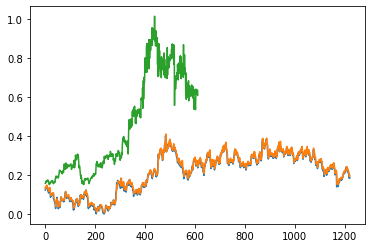

In [93]:
plt.plot(y_train)
plt.plot(train_predict) 
plt.plot(test_predict)
plt.show()

In [94]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.012247350368143154

In [95]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.027986650132737753

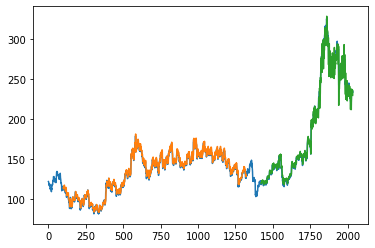

In [96]:

### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(scaler.inverse_transform(trainPredictPlot))
plt.plot(scaler.inverse_transform(testPredictPlot))
plt.show()

In [97]:
len(test_data)

713

In [98]:
x_input=test_data[613:].reshape(1,-1)
x_input.shape


(1, 100)

In [99]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input


[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

In [100]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6181699]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 

12 day output [[0.5367589]]
13 day input [0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 0.55167484 0.57883987 0.625
 0.63582516 0.62949346 0.62888072 0.62765523 0.62234477 0.63378268
 0.62622549 0.62214052 0.6

24 day output [[0.5141989]]
25 day input [0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464 0.55167484 0.57883987 0.625
 0.63582516 0.62949346 0.62888072 0.62765523 0.62234477 0.63378268
 0.62622549 0.62214052 0.62418301 0.6181699  0.60503542 0.59119773
 0.58021671 0.57224721 0.56608546 0.56070256 0.5556798  0.55101061
 0.54679155 0.54305297 0.5

In [152]:
day_new=np.arange(0,100)
day_pred=np.arange(101,131)

In [153]:
import matplotlib.pyplot as plt

In [154]:
len(df1)


2035

In [155]:
lst_output

[[0.618169903755188],
 [0.6050354242324829],
 [0.5911977291107178],
 [0.5802167057991028],
 [0.5722472071647644],
 [0.5660854578018188],
 [0.5607025623321533],
 [0.5556797981262207],
 [0.5510106086730957],
 [0.5467915534973145],
 [0.5430529713630676],
 [0.5397397875785828],
 [0.5367588996887207],
 [0.5340272188186646],
 [0.531491219997406],
 [0.529124915599823],
 [0.5269185900688171],
 [0.5248674750328064],
 [0.5229668021202087],
 [0.5212094783782959],
 [0.5195861458778381],
 [0.5180858373641968],
 [0.5166965126991272],
 [0.5154051780700684],
 [0.514198899269104],
 [0.5130643844604492],
 [0.5119892954826355],
 [0.510962188243866],
 [0.5099733471870422],
 [0.5090144872665405]]

In [156]:
df3 = df1.tolist()
df3.extend(lst_output)

In [157]:
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

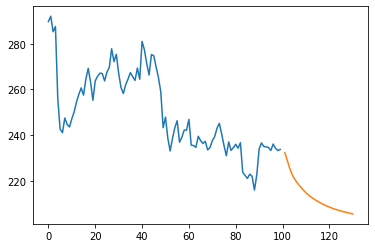

In [158]:

plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

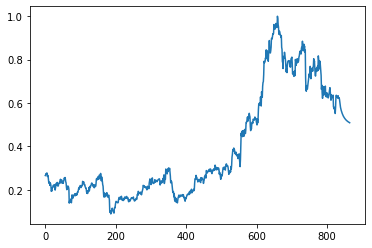

In [159]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

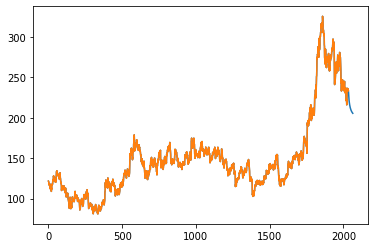

In [160]:
plt.plot(scaler.inverse_transform(df3))
plt.plot(scaler.inverse_transform(df1))